        E:\Data\FinalResults\0350 - Candidate Functions for SFER is already existed!
[ 0.72860714  0.26264685 -0.68809614  0.69782666]
[ 0.70730543  0.28008497 -0.68007812  0.69874184]
[ 0.72671475  0.2562457  -0.69351574  0.69176391]
[ 0.74194649  0.23806804 -0.707427    0.70472165]


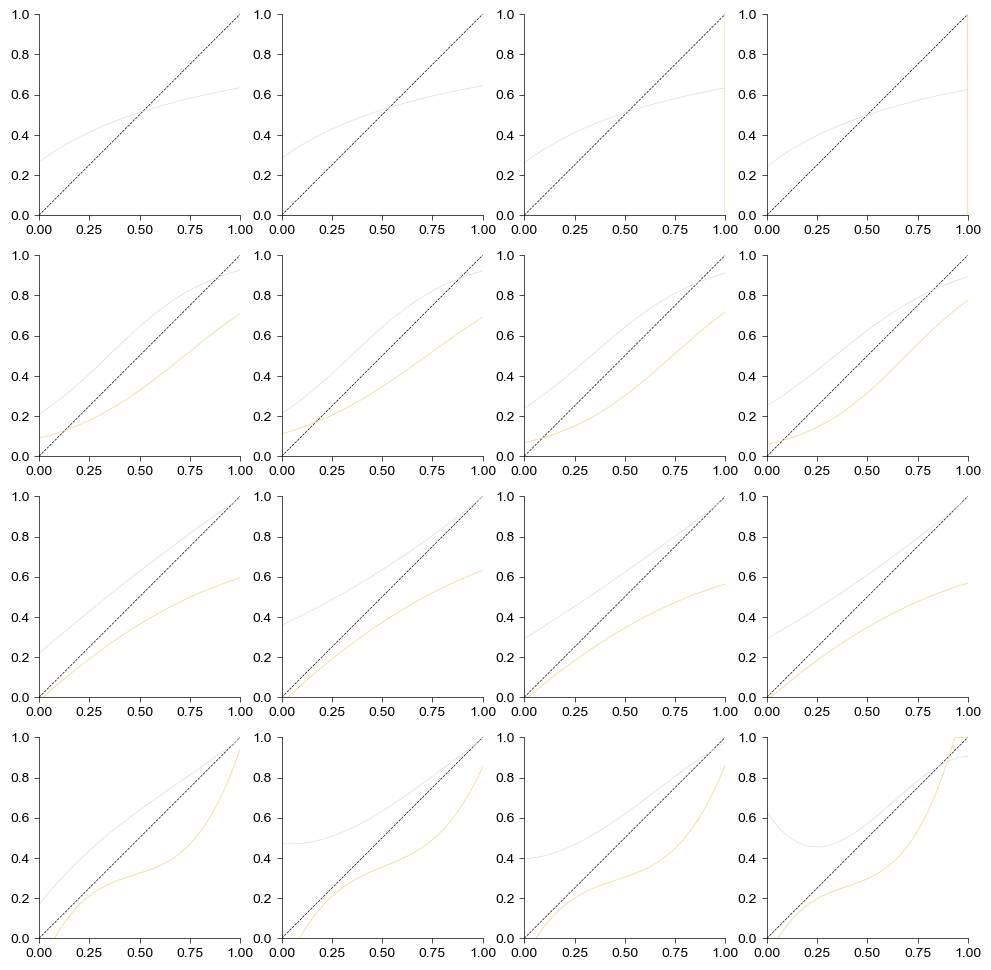

In [7]:
from mylib.statistic_test import *

from mylib.model import ContinuousHiddenStateModel

code_id = "0350 - Candidate Functions for SFER"
loc = join(figpath, code_id)
mkdir(loc)

fig, axes = plt.subplots(4,4, figsize = (4*3,4*3))
mice = [10209, 10212, 10224, 10227]
index = [-7, -6, -5, -4]

for i in range(4):
    paradigm = "MA"
    with open(join(figpath, "0346 - GLM for all sessions", f"{mice[i]}_{paradigm}_iter1.pkl"), 'rb') as handle:
        res = pickle.load(handle)
    
    for j in range(4):
        model: ContinuousHiddenStateModel = res[0][index[j]]
        if j == 0:
            print(model.params)
        
        ax = Clear_Axes(axes[j,i], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
        ax.plot([0, 1], [0, 1], 'k--', linewidth = 0.5)
        x = np.linspace(0, 1, 10000)
        y1 = model.predict(1, x)
        y2 = model.predict(0, x)
        ax.plot(x, y1, linewidth = 0.5, color="#CFDFEE")
        ax.plot(x, y2, linewidth = 0.5, color="#F0D685")
        ax.set_aspect("equal")
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

plt.savefig(join(loc, "candidate functions.png"), dpi = 600)
plt.savefig(join(loc, "candidate functions.svg"))
plt.show()
        